##### Import the required library and load the data

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('../Data/MachineLearningRating_v3.txt', sep='|', low_memory=False)

In [2]:
# Check basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

##### Descriptive Statistics and Data Quality Check

In [3]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_table)

# Data type check
print(df.dtypes)

                          Missing Values  Percentage
UnderwrittenCoverID                    0    0.000000
PolicyID                               0    0.000000
TransactionMonth                       0    0.000000
IsVATRegistered                        0    0.000000
Citizenship                            0    0.000000
LegalType                              0    0.000000
Title                                  0    0.000000
Language                               0    0.000000
Bank                              145961   14.594670
AccountType                        40232    4.022806
MaritalStatus                       8259    0.825819
Gender                              9536    0.953507
Country                                0    0.000000
Province                               0    0.000000
PostalCode                             0    0.000000
MainCrestaZone                         0    0.000000
SubCrestaZone                          0    0.000000
ItemType                               0    0.

##### Handle missing values

In [5]:
# For numerical columns, fill missing values with mean or median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
print(df[numerical_cols])

         UnderwrittenCoverID  PolicyID  PostalCode      mmcode  \
0                     145249     12827        1459  44069150.0   
1                     145249     12827        1459  44069150.0   
2                     145249     12827        1459  44069150.0   
3                     145255     12827        1459  44069150.0   
4                     145255     12827        1459  44069150.0   
...                      ...       ...         ...         ...   
1000093                31520       389        7493   4614100.0   
1000094                31520       389        7493   4614100.0   
1000095                31520       389        7493   4614100.0   
1000096                31519       389        7493   4614100.0   
1000097                31519       389        7493   4614100.0   

         RegistrationYear  Cylinders  cubiccapacity  kilowatts  NumberOfDoors  \
0                    2004        6.0         2597.0      130.0            4.0   
1                    2004        6.0         

In [6]:
# For categorical columns, fill missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
print(df[categorical_cols])

            TransactionMonth Citizenship          LegalType Title Language  \
0        2015-03-01 00:00:00              Close Corporation    Mr  English   
1        2015-05-01 00:00:00              Close Corporation    Mr  English   
2        2015-07-01 00:00:00              Close Corporation    Mr  English   
3        2015-05-01 00:00:00              Close Corporation    Mr  English   
4        2015-07-01 00:00:00              Close Corporation    Mr  English   
...                      ...         ...                ...   ...      ...   
1000093  2015-04-01 00:00:00          ZW         Individual    Mr  English   
1000094  2015-06-01 00:00:00          ZW         Individual    Mr  English   
1000095  2015-08-01 00:00:00          ZW         Individual    Mr  English   
1000096  2014-07-01 00:00:00          ZW         Individual    Mr  English   
1000097  2015-02-01 00:00:00          ZW         Individual    Mr  English   

                        Bank      AccountType  MaritalStatus   

##### Data Summarization

Descriptive Statistics and variability of numerical data

In [9]:
# Descriptive statistics
print("Descriptive statistics:")
print(df.describe())

# Calculate variability for numerical features
variability = df[['TotalPremium', 'TotalClaims']].var()
print(variability)

Descriptive statistics:
       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  1.000098e+06   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.488056e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360059e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear     Cylinders  cubiccapacity     kilowatts  \
count      1.000098e+06  1.000098e+06   1.000098e+06  1.000098e+06   
mean       2.010225e+03  4.046616e+00   2.466869e+03  9.721553e+01   
std        3.261391e+00  2.939410e-01   4.427106e+02  1.939061e+01   
min        1.987000e+03  0.000000e+00   0.00000

Data Structure

In [11]:
print("\nData structure:")
print(df.dtypes)


Data structure:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoo

##### Univariate Analysis

##### Histogram for numerical columns

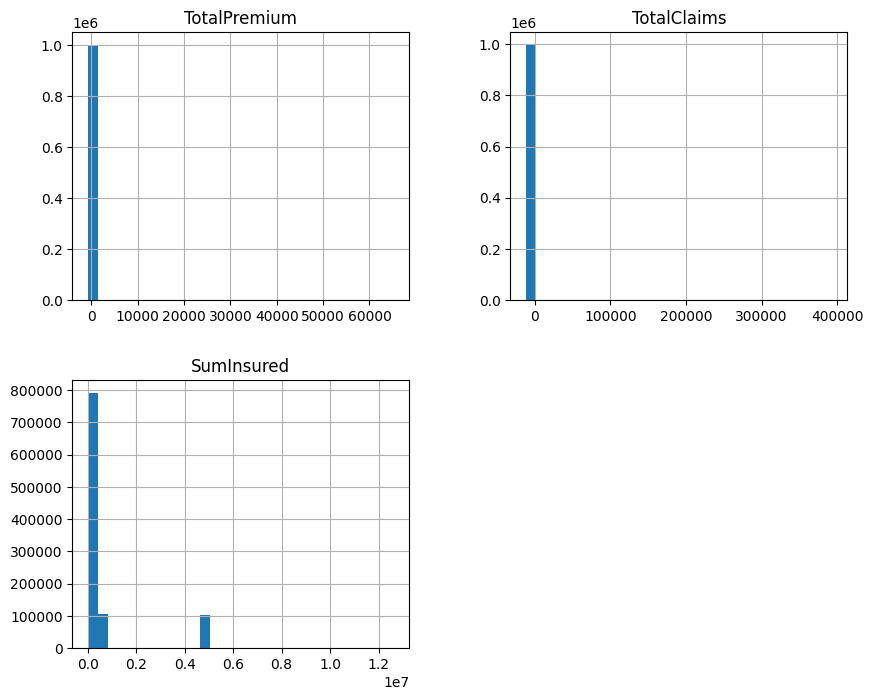

In [12]:
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured']
df[numerical_columns].hist(figsize=(10, 8), bins=30)
plt.show()

##### Bar chart for categorical columns

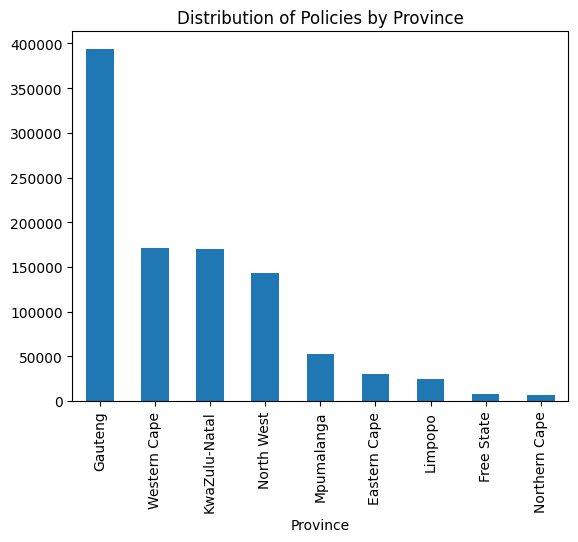

In [13]:
df['Province'].value_counts().plot(kind='bar', title="Distribution of Policies by Province")
plt.show()

##### Bivariate or Multivariate Analysis

Correlation Matrix

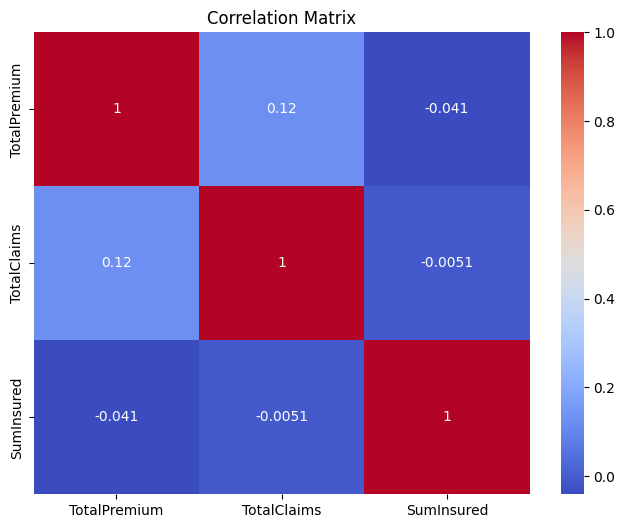

In [14]:
# Correlation matrix for numerical variables
correlation_matrix = df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Scatter Plot (Total Premium vs Total Claims by Zip Code)

/home/semre/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


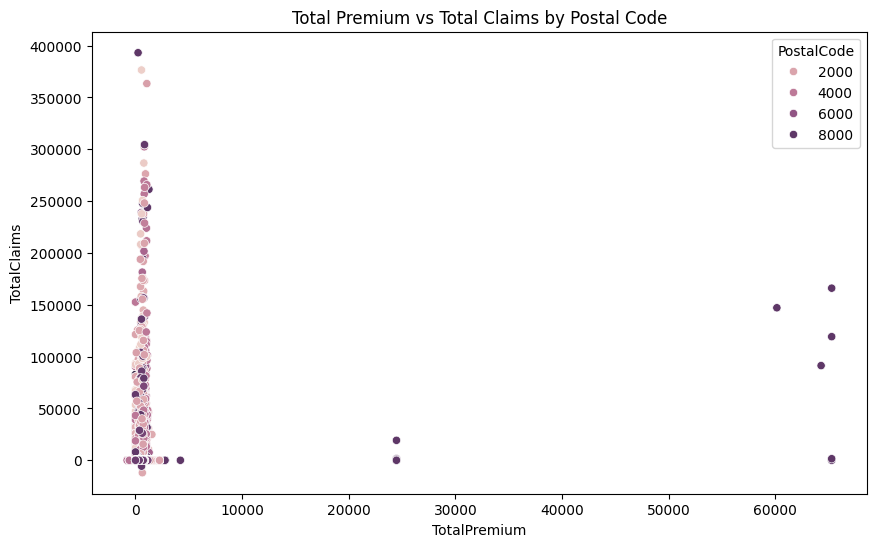

In [15]:
# Scatter plot of Total Premium vs Total Claims by Postal Code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='PostalCode')
plt.title('Total Premium vs Total Claims by Postal Code')
plt.show()

##### Data Comparison

Bar Plot of Cover Type by Province

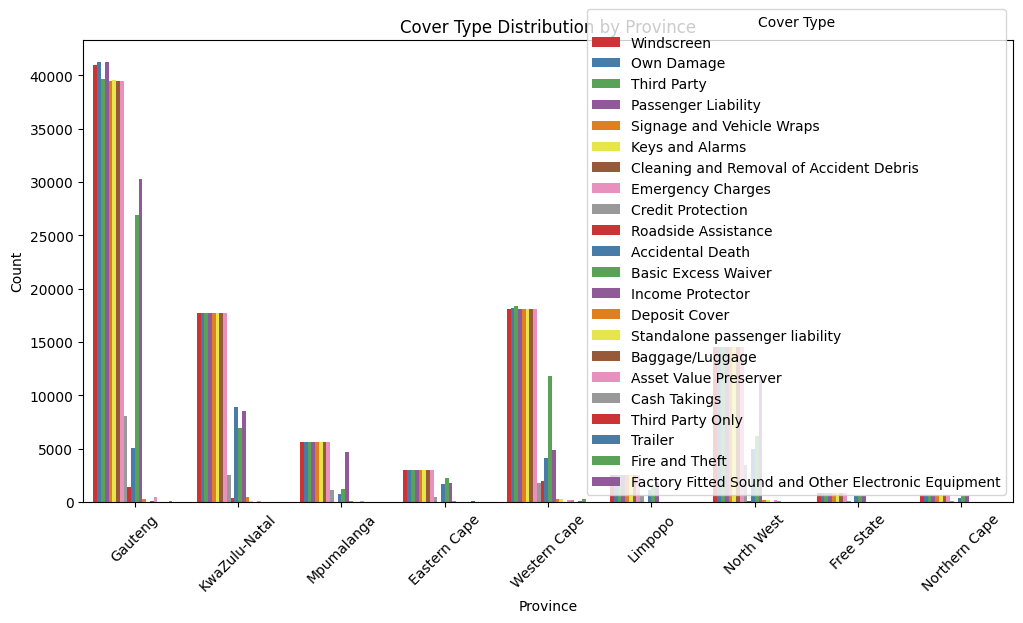

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Province', hue='CoverType', data=df, palette='Set1')
plt.title('Cover Type Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cover Type')
plt.show()

Box Plot of Total Premium by Province

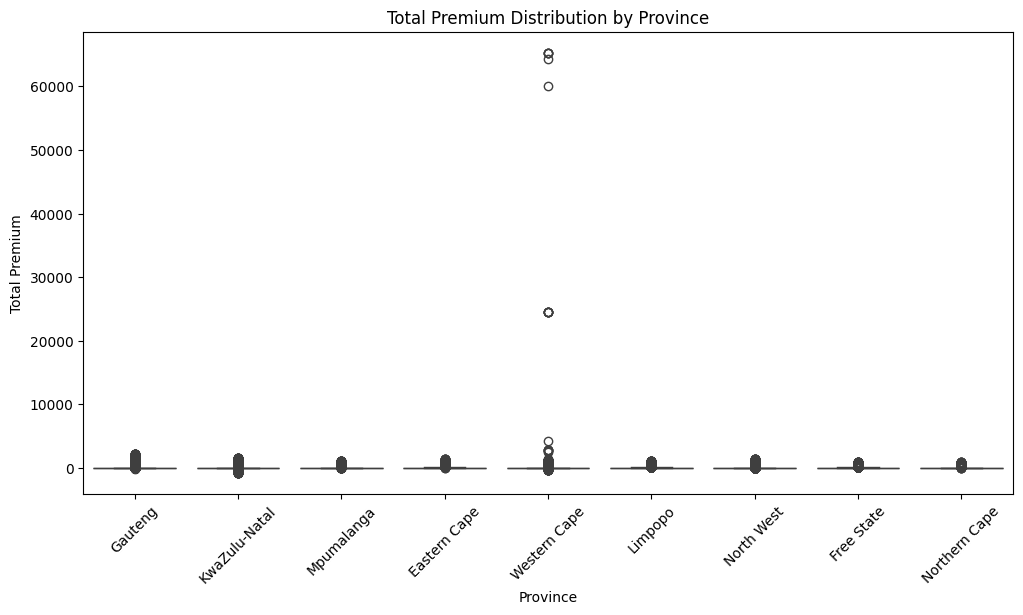

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Province', y='TotalPremium', data=df)
plt.title('Total Premium Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Total Premium')
plt.xticks(rotation=45)
plt.show()

Bar Plot of Top Auto Makes by Province

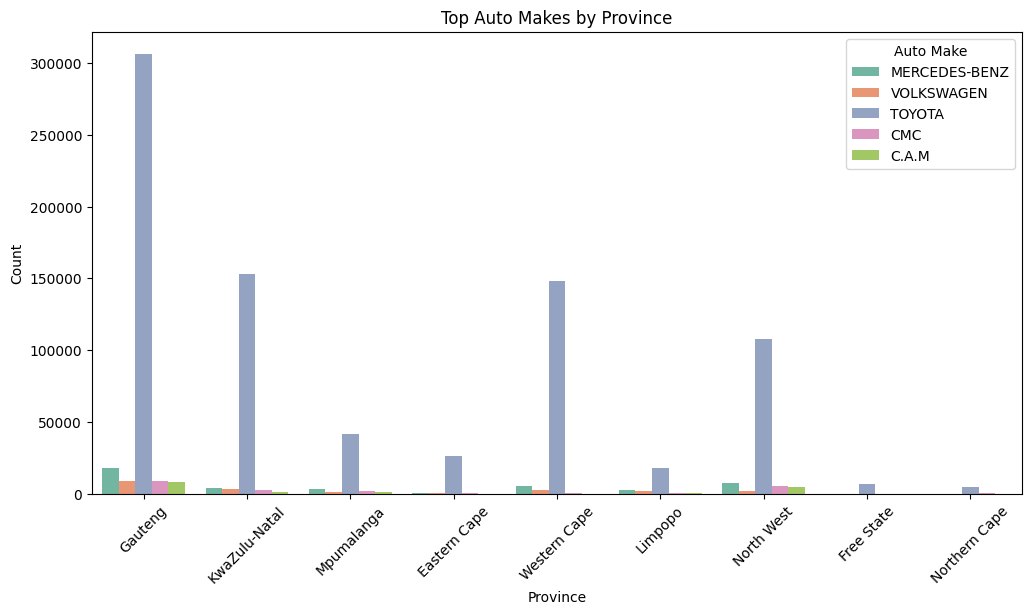

In [19]:
top_auto_makes = df['make'].value_counts().head(5).index
top_auto_data = df[df['make'].isin(top_auto_makes)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Province', hue='make', data=top_auto_data, palette='Set2')
plt.title('Top Auto Makes by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Auto Make')
plt.show()

##### Outlier Detection Using Box Plots

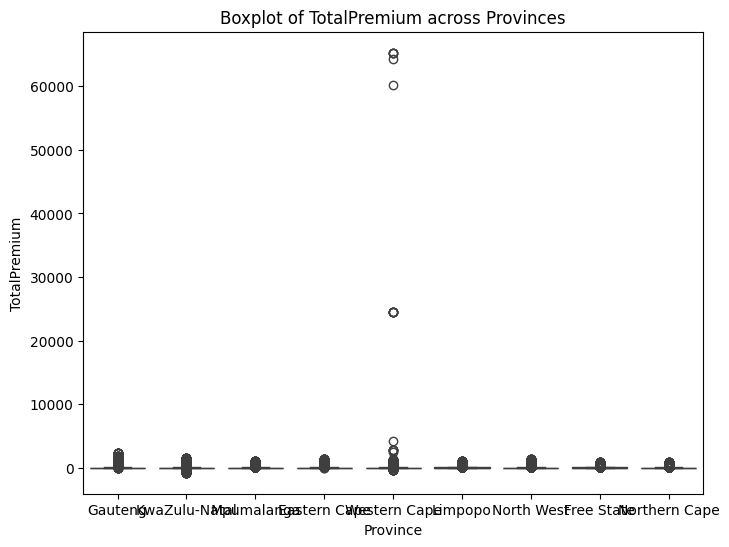

In [20]:
# Box plot to detect outliers in Total Premium
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='TotalPremium', x='Province')
plt.title("Boxplot of TotalPremium across Provinces")
plt.show()

##### Visualization

1. Geographical Distribution of TotalPremium and TotalClaims

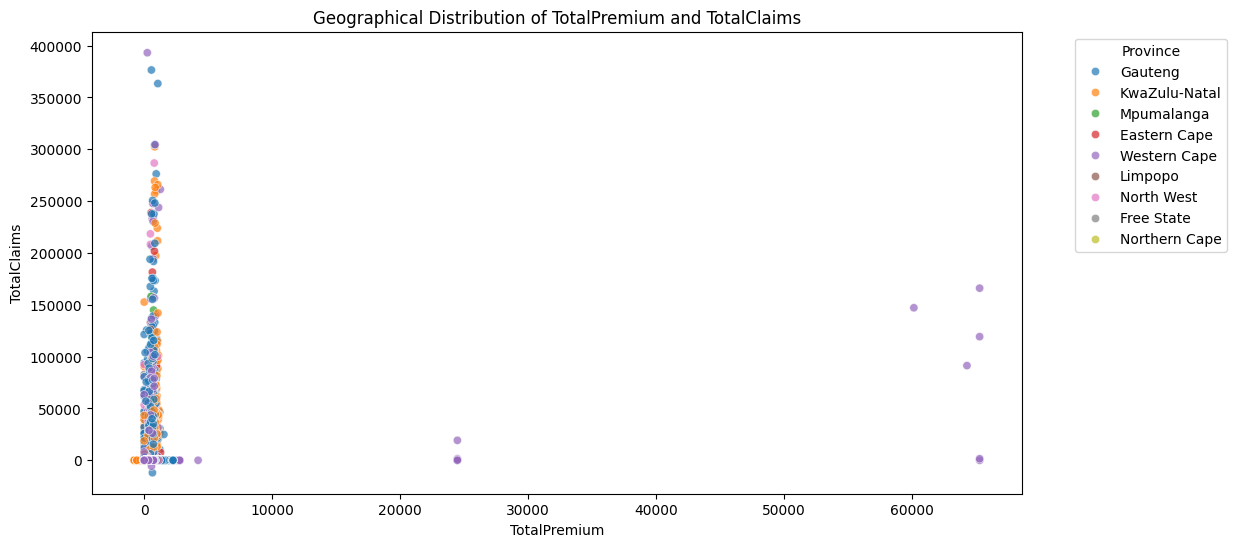

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=df, alpha=0.7)
plt.title('Geographical Distribution of TotalPremium and TotalClaims')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

2. Trend Analysis of TotalPremium Over Time

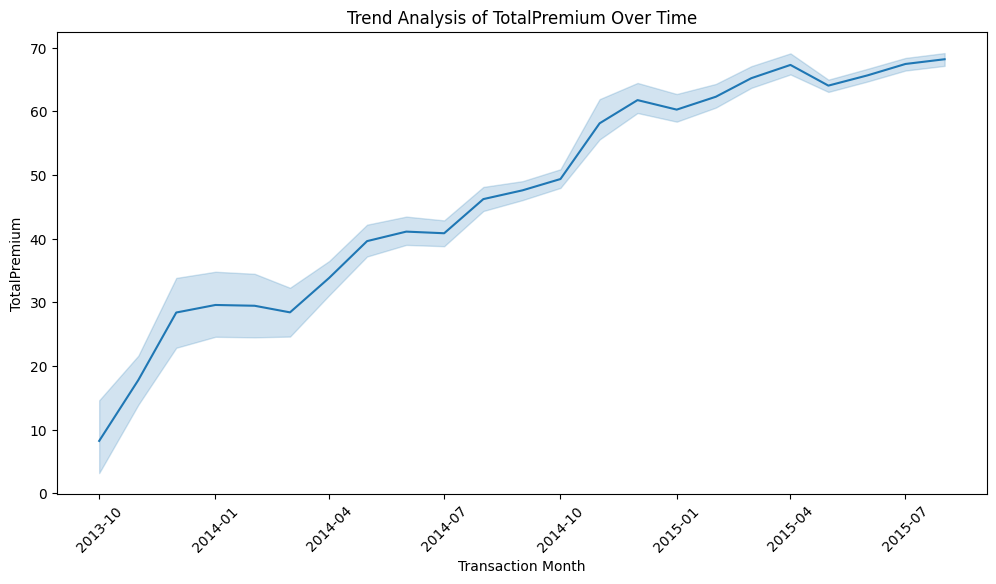

In [22]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionMonth', y='TotalPremium', data=df)
plt.title('Trend Analysis of TotalPremium Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('TotalPremium')
plt.xticks(rotation=45)
plt.show()

3. elationship Between TotalPremium and SumInsured

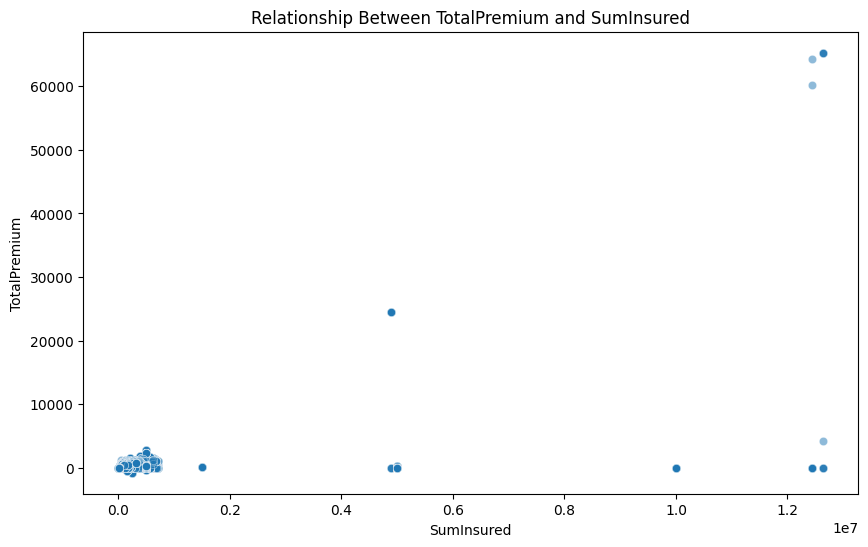

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SumInsured', y='TotalPremium', data=df, alpha=0.5)
plt.title('Relationship Between TotalPremium and SumInsured')
plt.xlabel('SumInsured')
plt.ylabel('TotalPremium')
plt.show()